# An Outbreak by the Numbers
## Lenix Carter

We begin by simply importing the relevant packages and loading in our files.

In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns

In [2]:
covid_cases = pd.read_csv('covid_cases_by_date.csv', sep=',')
covid_cases = pd.DataFrame(covid_cases.replace(to_replace="US", value="United States"))
covid_cases = covid_cases.set_index(covid_cases["Country/Region"])
covid_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
Japan,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
Singapore,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
Nepal,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Canada,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cape Verde,NaN,Cape Verde,15.1111,-23.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
East Timor,NaN,East Timor,-8.5500,125.5600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


This DataFrame has much more data than we need, so we simplify to just the number of cases most recently.

However, this list also delineates by states. While this may be useful for later, for now, we wish to simply analyze by country. We add together duplicate country entries.

In [29]:
covid_by_country = covid_cases["3/21/20"].groupby(by=covid_cases.index).sum()
covid_by_country

Country/Region
Afghanistan     24
Albania         76
Algeria        139
Andorra         88
Angola           2
              ... 
Uzbekistan      43
Venezuela       70
Vietnam         94
Zambia           2
Zimbabwe         3
Name: 3/21/20, Length: 166, dtype: int64

In [4]:
ranked_populations = pd.read_csv('population_by_country', sep=',', index_col=1)
ranked_populations

,Pos,Value
Name,,
China,1,1367485388
India,2,1251695584
European Union,3,513949445
United States,4,321368864
Indonesia,5,255993674
...,...,...
Tokelau,234,1337
Niue,235,1190
Holy See (Vatican City),236,842


In [5]:
population_by_country = ranked_populations["Value"]
population_by_country

Name
China                      1367485388
India                      1251695584
European Union              513949445
United States               321368864
Indonesia                   255993674
                              ...    
Tokelau                          1337
Niue                             1190
Holy See (Vatican City)           842
Cocos (Keeling) Islands           596
Pitcairn Islands                   48
Name: Value, Length: 238, dtype: int64

In [6]:
cases_pop = [covid_by_country, population_by_country]
cases_pop = pd.concat(cases_pop, axis=1)
cases_pop

,3/21/20,Value
Afghanistan,24.0,32564342.0
Albania,76.0,3029278.0
Algeria,139.0,39542166.0
Andorra,88.0,85580.0
Angola,2.0,19625353.0
...,...,...
Tokelau,NaN,1337.0
Niue,NaN,1190.0
Holy See (Vatican City),NaN,842.0
Cocos (Keeling) Islands,NaN,596.0


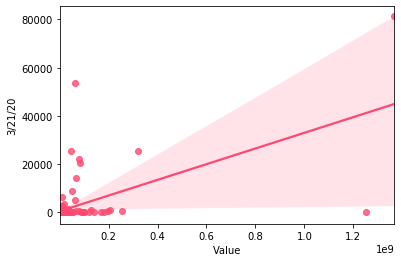

In [72]:
colors=["#ffea49", "#ff4970", "#499bff"]
case_pop_splot = sns.regplot(cases_pop['Value'], 
                             cases_pop['3/21/20'], 
                             color=colors[1])

[None, None]

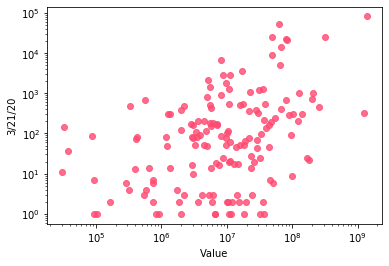

In [74]:
case_pop_splot = sns.regplot(cases_pop['Value'], 
                             cases_pop['3/21/20'], 
                             color=colors[1],
                             fit_reg=False)
case_pop_splot.set(xscale='log', yscale='log')

In [8]:
ranked_areas = pd.read_csv('area_by_country', sep=',', index_col=1)
ranked_areas

,Pos,Value
Name,,
Russia,1,17098242
Canada,2,9984670
United States,3,9826675
China,4,9596960
Brazil,5,8514877
...,...,...
Johnston Atoll,253,3
Monaco,254,2
Howland Island,255,2


In [9]:
area_by_country = ranked_areas["Value"]
area_by_country

Name
Russia                     17098242
Canada                      9984670
United States               9826675
China                       9596960
Brazil                      8514877
                             ...   
Johnston Atoll                    3
Monaco                            2
Howland Island                    2
Kingman Reef                      1
Holy See (Vatican City)           0
Name: Value, Length: 257, dtype: int64

In [10]:
density_by_country = population_by_country.div(area_by_country)
density_by_country.sort_values(ascending=False)

Name
Holy See (Vatican City)                                   inf
Macau                                            2.116896e+04
Monaco                                           1.526750e+04
Singapore                                        8.141280e+03
Hong Kong                                        6.445042e+03
                                                     ...     
Saint Barthelemy                                          NaN
South Georgia and South Sandwich Islands                  NaN
Spratly Islands                                           NaN
United States Pacific Island Wildlife Refuges             NaN
Wake Island                                               NaN
Name: Value, Length: 259, dtype: float64

In [11]:
cases_dens = [covid_by_country, density_by_country]
cases_dens = pd.concat(cases_dens, axis=1)
cases_dens.sort_values(by='3/21/20', ascending=False)

,3/21/20,Value
China,81305.0,142.491517
Italy,53578.0,205.266875
United States,25489.0,32.703724
Spain,25374.0,95.269078
Germany,22213.0,226.468980
...,...,...
Wake Island,NaN,NaN
Wallis and Futuna,NaN,109.950704
West Bank,NaN,475.318430
Western Sahara,NaN,2.146113


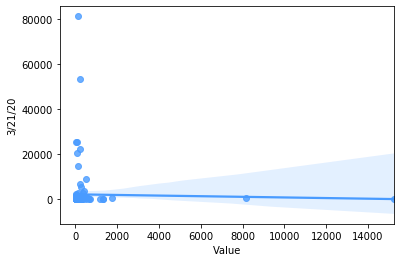

In [67]:
case_density_splot = sns.regplot(cases_dens['Value'], 
                                 cases_dens['3/21/20'], 
                                 color=colors[2])

[None, None]

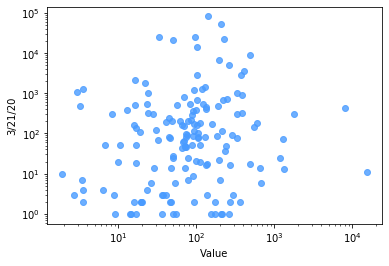

In [87]:
case_density_splot = sns.regplot(cases_dens['Value'], 
                                 cases_dens['3/21/20'], 
                                 color=colors[2],
                                 fit_reg=False)
case_density_splot.set(xscale='log', yscale='log')

In [14]:
ranked_health_exp = pd.read_csv('health_exp_by_country', sep=',', index_col=1)
ranked_health_exp

,Pos,Value
Name,,
United States,1,17.9
Marshall Islands,2,15.6
Liberia,3,15.5
Tuvalu,4,15.4
Sierra Leone,5,15.1
...,...,...
Kuwait,187,2.5
Brunei,188,2.3
Qatar,189,2.2


In [15]:
health_exp_by_country = ranked_health_exp["Value"]
health_exp_by_country

Name
United States       17.9
Marshall Islands    15.6
Liberia             15.5
Tuvalu              15.4
Sierra Leone        15.1
                    ... 
Kuwait               2.5
Brunei               2.3
Qatar                2.2
Turkmenistan         2.0
Burma                1.8
Name: Value, Length: 191, dtype: float64

In [16]:
cases_health = [covid_by_country, health_exp_by_country]
cases_health = pd.concat(cases_health, axis=1)
cases_health.sort_values(by='3/21/20', ascending=False)

,3/21/20,Value
China,81305.0,5.4
Italy,53578.0,9.2
United States,25489.0,17.9
Spain,25374.0,9.6
Germany,22213.0,11.3
...,...,...
"Congo, Republic of the",NaN,3.2
Laos,NaN,2.9
South Sudan,NaN,2.6
Turkmenistan,NaN,2.0


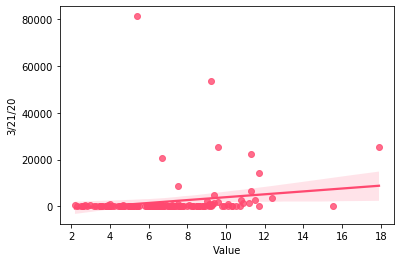

In [58]:
cases_health_splot = sns.regplot(cases_health['Value'], 
                                 cases_health['3/21/20'], 
                                 color=colors[1])

[None]

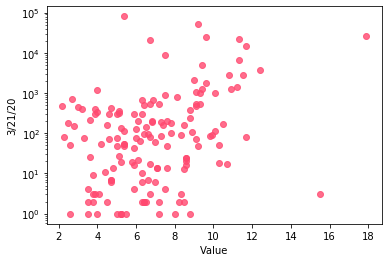

In [66]:
cases_health_splot = sns.regplot(cases_health['Value'], 
                                 cases_health['3/21/20'], 
                                 color=colors[1],
                                 fit_reg=False)
cases_health_splot.set(yscale='log')

I had by this point grown sort of upset at the state of this dive into the outbreak. I had certainly expected population density to correlate, and it does weakly. I had expected healthcare to correlate, and it does but negatively. So far my expectations had been shot down.  

It was during a conversation with a friend where I had the curiosity of airports come to mind. Surely the number of airports might have something to do with it.

In [1]:
ranked_airports = pd.read_csv('airports_by_country', ',', index_col=1)
ranked_airports

NameError: name 'pd' is not defined

In [19]:
airports_by_country = ranked_airports["Value"]
airports_by_country

Name
United States                                    13513
Brazil                                            4093
Mexico                                            1714
Canada                                            1467
Russia                                            1218
                                                 ...  
Saint Helena, Ascension, and Tristan da Cunha        1
Saint Martin                                         1
Sint Maarten                                         1
Tuvalu                                               1
Barbados                                             1
Name: Value, Length: 236, dtype: int64

In [20]:
cases_airports = [covid_by_country, airports_by_country]
cases_airports = pd.concat(cases_airports, axis=1)
cases_airports.sort_values(by='3/21/20', ascending=False)

,3/21/20,Value
China,81305.0,507.0
Italy,53578.0,129.0
United States,25489.0,13513.0
Spain,25374.0,150.0
Germany,22213.0,539.0
...,...,...
Saint Barthelemy,NaN,1.0
"Saint Helena, Ascension, and Tristan da Cunha",NaN,1.0
Saint Martin,NaN,1.0
Sint Maarten,NaN,1.0


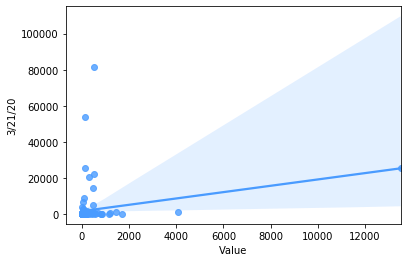

In [39]:
cases_airports_splot = sns.regplot(cases_airports['Value'], 
                                   cases_airports['3/21/20'], 
                                   color=colors[2])

[None, None]

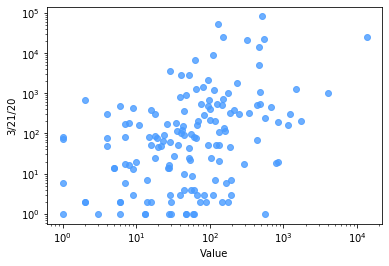

In [90]:
cases_airports_splot = sns.regplot(cases_airports['Value'], 
                                   cases_airports['3/21/20'], 
                                   color=colors[2],
                                   fit_reg=False)
cases_airports_splot.set(xscale='log', yscale='log')

Finally, something has a correlation shaped more like my expectations. However, this data is still weaker than I wanted. This perhaps comes from the fact that number of passengers would be a more viable metric than number of airlines. 

I searched for a data set that showed number of passengers per year.

In [122]:
ranked_passengers = pd.read_csv('passengers_by_country.csv', sep=',', index_col=0)
ranked_passengers

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,2.742800e+05,NaN,NaN
Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2.209428e+06,1929907.0,1917924.0,1647425.0,1.722613e+06,NaN,NaN
Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1.409952e+06,1244491.0,1482546.0,1375523.0,1.516628e+06,NaN,NaN
Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,1.516320e+05,NaN,26634.0,204090.0,3.031370e+05,NaN,NaN
Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",YEM,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.492073e+06,1.299707e+06,1664220.0,1.665552e+06,443685.0,242723.0,132571.0,3.363100e+05,NaN,NaN
South Africa,ZAF,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.640778e+07,1.757157e+07,16311250.0,1.702664e+07,18882898.0,19744932.0,20821044.0,2.392175e+07,NaN,NaN


In [130]:
passengers_by_country = ranked_passengers["2018"]
passengers_by_country

Country Name
Aruba           2.742800e+05
Afghanistan     1.722613e+06
Angola          1.516628e+06
Albania         3.031370e+05
Andorra                  NaN
                    ...     
Kosovo                   NaN
Yemen, Rep.     3.363100e+05
South Africa    2.392175e+07
Zambia          8.904000e+03
Zimbabwe        2.825390e+05
Name: 2018, Length: 264, dtype: float64

In [125]:
cases_passengers = [covid_by_country, passengers_by_country]
cases_passengers = pd.concat(cases_passengers, axis=1)
cases_passengers

,3/21/20,2018
Afghanistan,24.0,1.722613e+06
Albania,76.0,3.031370e+05
Algeria,139.0,6.442442e+06
Andorra,88.0,NaN
Angola,2.0,1.516628e+06
...,...,...
Virgin Islands (U.S.),NaN,NaN
Vanuatu,NaN,3.746030e+05
World,NaN,4.232645e+09
Samoa,NaN,1.377700e+05


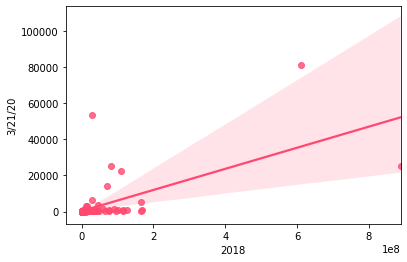

In [131]:
cases_passengers_splot = sns.regplot(cases_passengers['2018'], 
                                    cases_passengers['3/21/20'], 
                                    color=colors[1])

[None, None]

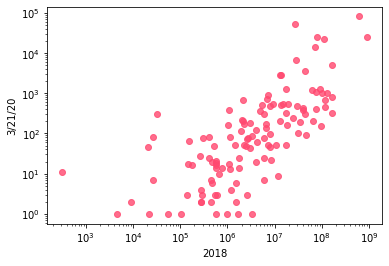

In [132]:
cases_passengers_splot = sns.regplot(cases_passengers['2018'], 
                                    cases_passengers['3/21/20'], 
                                    color=colors[1],
                                    fit_reg=False)
cases_passengers_splot.set(xscale='log', yscale='log')